# Polynomial Fit with Regularizations

**Name**: ZHU GUANGYU  
**Student ID**: 20165953  
**Github Repo**: [assignment12](https://github.com/z1ggy-o/cv_assignment/tree/master/assignment12)  

---

Samilar with assignment11, this is also a *multi-objective least squares* problem.

This time we want to find a optimal set of model parameters that provide the least square approximate slolution:

$$ E(\theta ; \lambda) = ||A\theta - y||^{2}_{2} + \lambda ||\theta||^{2}_{2}$$

By stacking we can change our weighted sum least squares to a standard least squares form

$$
\begin{Vmatrix}
\begin{bmatrix}\sqrt{\lambda_{1}}A_{1}\\ \vdots \\ \sqrt{\lambda_{k}}A_{k} \end{bmatrix}x -
\begin{bmatrix}\sqrt{\lambda_{1}}b_{1}\\ \vdots \\ \sqrt{\lambda_{k}}b_{k} \end{bmatrix}
\end{Vmatrix}^{2}
=
\begin{Vmatrix}\tilde{A}x - \tilde{b} \end{Vmatrix}^{2}
$$

So, our cost function can be expressed as

$$
\begin{Vmatrix}
\begin{bmatrix}A \\ \sqrt{\lambda}I \end{bmatrix} \theta -
\begin{bmatrix}y \\ 0 \end{bmatrix}
\end{Vmatrix}^{2}
=
\begin{Vmatrix}\tilde{A}x - \tilde{b} \end{Vmatrix}^{2}
$$

We define our feature function as

$$\hat{f}(x) = \theta_{0} + \theta_{1}x + \cdots + \theta_{p}x^{p}$$

Our matrix $A$ becomes to:
$$\begin{bmatrix}
    1 & x^{(1)} & \cdots & (x^{1})^{p}\\
    1 & x^{(2)} & \cdots & (x^{2})^{p}\\
    \vdots & \vdots & & \vdots \\
    1 & x^{(N)} & \cdots & (x^{N})^{p}
\end{bmatrix}$$

Have all this infromations, we can compute the parameters $\theta$.

---

## Implementation

### Generate data set

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (clean) y-coordinate data 
# y2 : (noisy) y-coordinate data

def fun(x):
 
    # f = np.sin(x) * (1 / (1 + np.exp(-x))) 
    f = np.abs(x) * np.sin(x)

    return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x) 			# clean points
y2      = y1 + nn * std		# noisy points

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

<Figure size 640x480 with 1 Axes>

## Build cost function

Assume our input data set $x$ is a $n$-vector, our parameter is a $p$-vector, then $A$ is a $n \times p$ matrix and $I$ is a $p$-identity matrix. We combine them into a $\tilde{A}$ matrix.

In [2]:
def create_tilde_matrix(n, p, weight, data):
    """Build tilde matrix A in cost function
    
    Arguments:
        n: number of input data
        p: degree of polynomial
        weight: weight of secondary objective
        data: input data
    """
    
    I = np.identity(p+1)
    I = math.sqrt(weight) * I
    
    feature_matrix = build_feature_matix(data, p)
    
    A = np.vstack((feature_matrix, I))
    
    return A


def build_feature_matix(data, p):
    """Build basic function matrix
    
    data: input data set
    p: degree of polynomial
    """
    
    matrix = []
    
    for xi in data:
        poly = [xi**dg for dg in range(p+1)]
        matrix.append(poly)
        
    return np.array(matrix)

### Generate $\tilde{b}$

$\tilde{b}$ has same length with $\tilde{A}$: $n + p$

In [3]:
def create_tilde_b(n, p, data_noisy):
    """Create b vector in cost functions
    
    Arguments:
        n: number of input data
        p: degree of polynomial
        data_noisy: noisy data
    Return:
        macthing b vector
    """
    
    length = n + p + 1  # add 1 for degree 0
    
    b = np.zeros(length)
    for i in range(len(data_noisy)):
        b[i] = data_noisy[i]
        
    return b

### Compute $\theta$

In [4]:
def compute_params(A, y):
    return np.linalg.lstsq(A, y, rcond=None)[0]

### Fitting function

Let's combine all the part together to generate our approximate values.

In [5]:
def fitting(data_input, output_noisy, p, weight):
    """Compute approximate values with given poly degree
    
    Arguments:
        data_input: input data
        output_noisy: noisy measurements
        p: degree of polynomial
        weight: weight of secondary objective
    Return:
        
    """
    
    n = len(data_input)
    
    A = create_tilde_matrix(n, p, weight, data_input)
    b = create_tilde_b(n, p, output_noisy)
    
    # compute approximation
    params = compute_params(A, b)
    approx = np.inner(np.array([data_input**dg for dg in range(p+1)]).T, params)
    
    # compute error with approximation and clear data
    basic_A = build_feature_matix(data_input, p)
    error = error_function(A, params, b)
    
    return approx, error


def error_function(A, theta, b):
    cost_func = np.inner(A, theta) - b
    
    return np.linalg.norm(cost_func)**2

---

## Check fitting function

Now let's try our fitting function to see how $p$ and $\lambda$ affect the result.

### Fix $\lambda$ while change $p$

First use a fixed $\lambda$ and chose $p$ from $6 - 15$ to see the result.

To convenient plotting, we define a plot function here

In [6]:
def plot_vary_p(x, y_clean, y_noisy, p, weight):
    
    y, error = fitting(x, y_noisy, p, weight)
    
    # Plot part
    plt.title("p = {}, lambda = {}".format(p, weight))
    plt.plot(x, y_clean, 'b.', x, y_noisy, 'k.', x, y, 'r')
    plt.legend(['Clean', 'Noisy', 'Fit'], loc='upper left')
    plt.show()
    
    return error

Here use define our $\lambda$ to $0.25$.

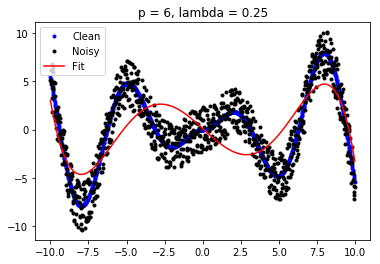

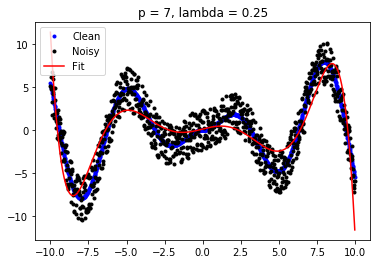

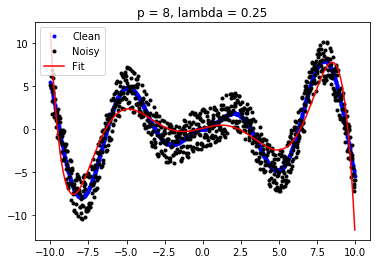

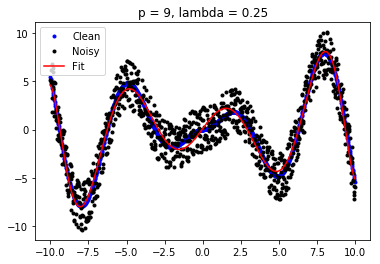

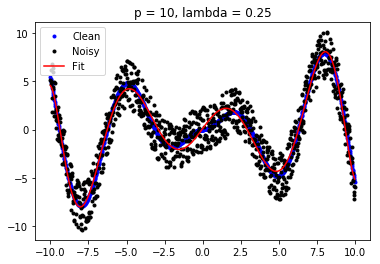

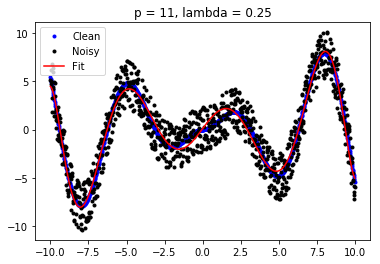

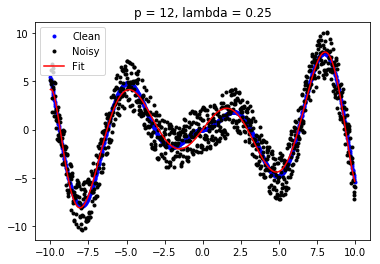

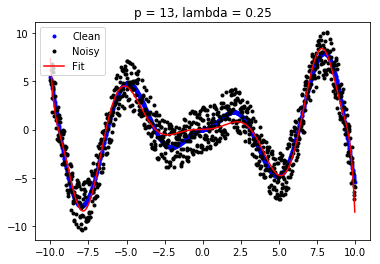

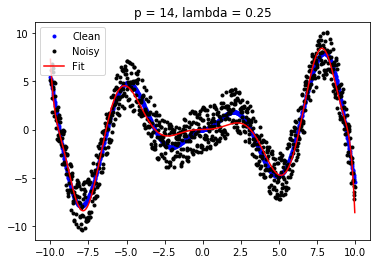

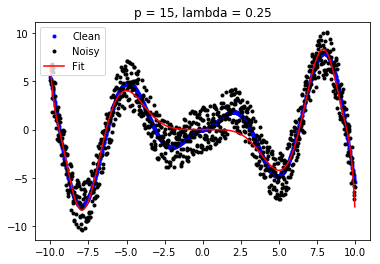

In [7]:
error_histo_p = []

for p in range(6, 16):
    error_histo_p.append(plot_vary_p(x, y1, y2, p, 0.25))

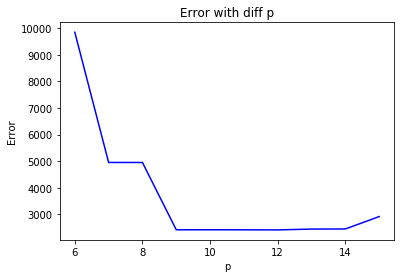

In [8]:
p_axis = [p for p in range(6, 16)]

plt.title("Error with diff p")
plt.plot(p_axis, error_histo_p, 'b-')
plt.xlabel('p')
plt.ylabel('Error')
plt.show()

First along $p$ increase error is dreacing, but after 12 error changes to increasing again.

### Fix $p$ while vary $\lambda$

Now, let'us fix $p$ and change $\lambda$ to see how result changes.

Since when $p = 9$ the error first time near the smallest value, we choose $9$ be our $p$'s value.

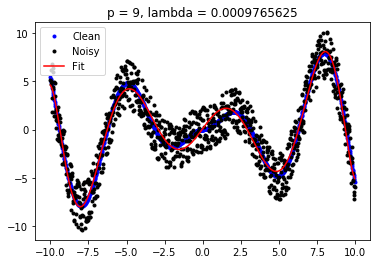

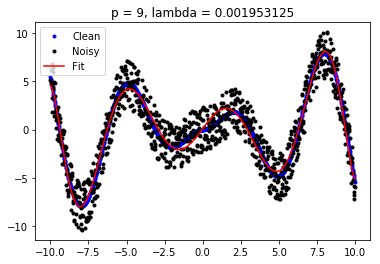

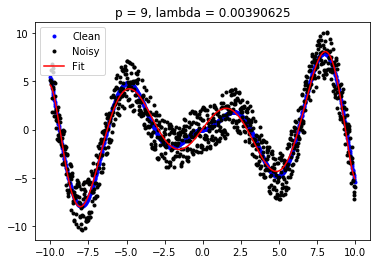

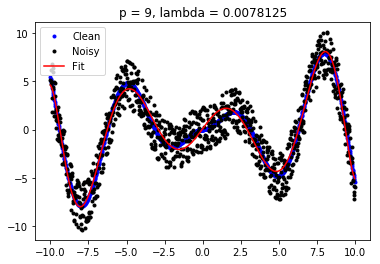

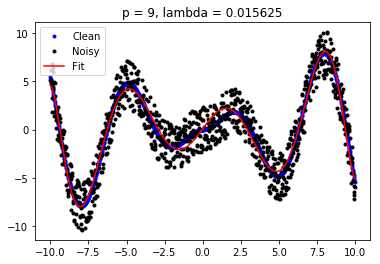

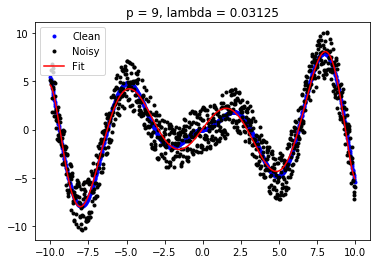

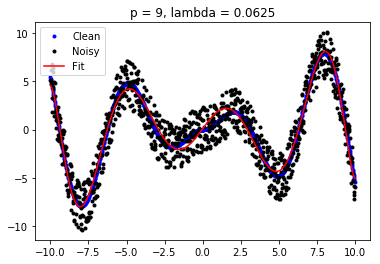

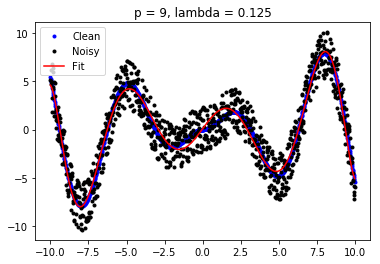

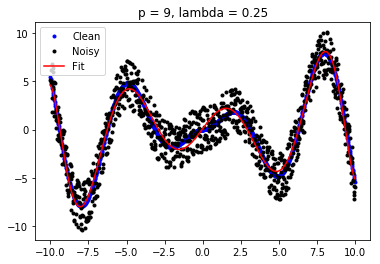

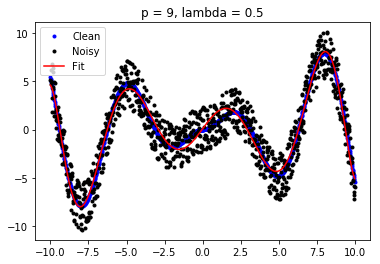

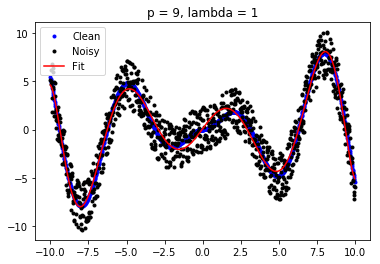

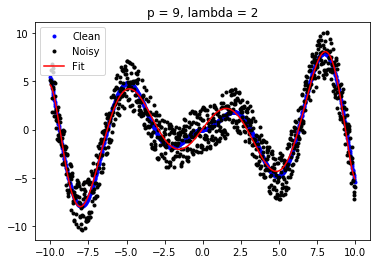

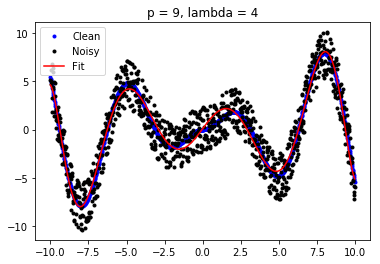

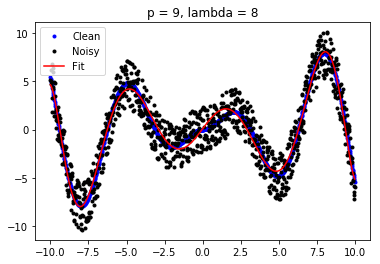

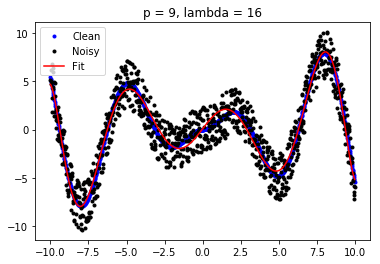

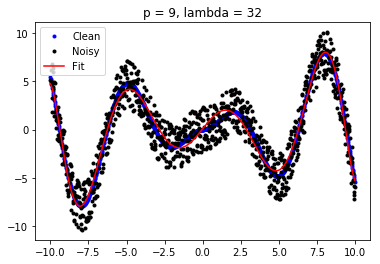

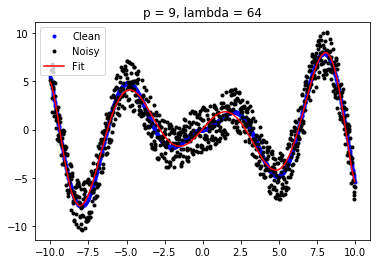

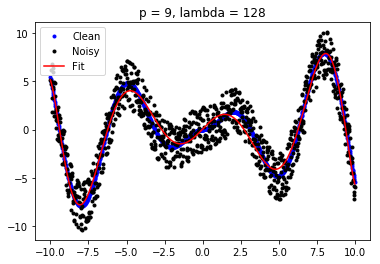

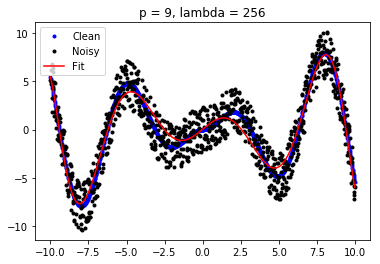

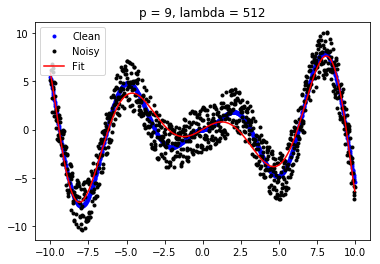

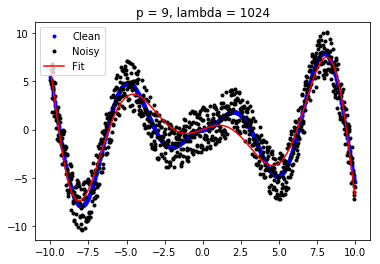

In [9]:
lambdas = [2**n for n in range(-10, 11)]

error_histo = []
for lam in lambdas:
    error_histo.append(plot_vary_p(x, y1, y2, 9, lam))

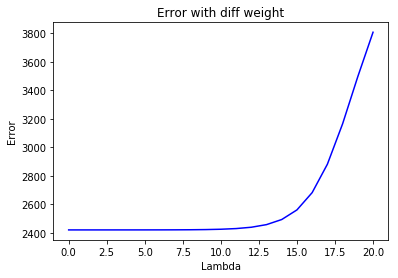

In [10]:
plt.title("Error with diff weight")
plt.plot(error_histo, 'b-')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.show()

Extend the range of $\lambda$

In [11]:
lams = [2**n for n in range(-200, 201)]
errs = []

for lam in lams:
    _, error = fitting(x, y2, 9, lam)
    errs.append(error)

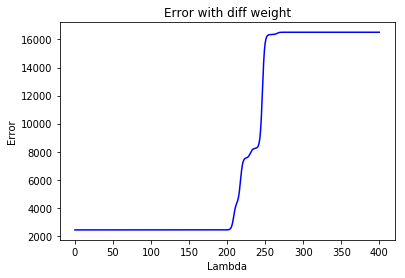

In [12]:
plt.title("Error with diff weight")
plt.plot(errs, 'b-')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.show()

When $\lambda$ is small, the approximate result is close to input data. When $\lambda$ becomes big, it focus on keep $\theta$ small, so error value start to grow again.